In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.linear_models.linear_regression import LinearRegression
from allison.utils.functions.loss import mean_square_error
from allison.utils.metrics import r2_score
from allison.utils.functions.data import train_test_split

In [2]:
n = 1000
x=np.linspace(2,20,n)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,5.724060
1,2.018018,6.667646
2,2.036036,6.718168
3,2.054054,7.208531
4,2.072072,5.937063


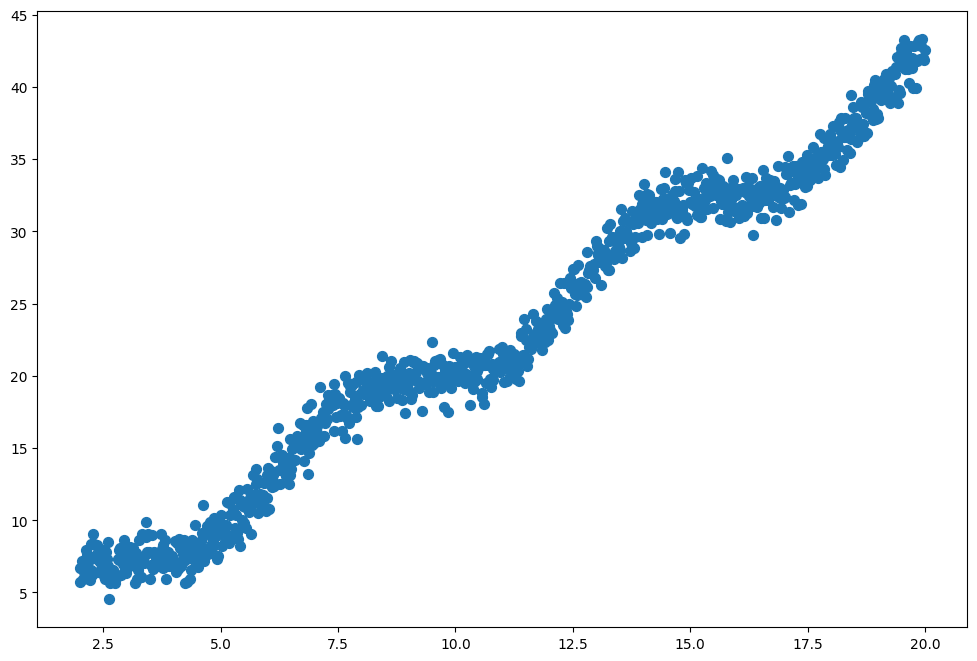

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [4]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [5]:
model=LinearRegression()

model.optimizers(mean_square_error,
                 r2_score,
                 0.001)

model.train(X_train, y_train,n_iters=20, history_train=True)

[22.72839632 32.32873173 33.31858465 30.60125386 20.54334735 30.91305963
 27.3040181  21.50104542 35.25425731  9.64747973 33.70785744  7.04460919
 28.78752656 41.3674009  37.71762388 34.49214322 16.5243213  35.72549475
 32.61250509 19.30861592 22.83971586 11.25946036 19.0606855  22.47405112
 12.85825714 13.46553585  8.63510575 42.81214636 34.97678126 39.08955365
 18.77563104  7.90303765 27.57439581 21.97652629 20.06469834 12.17096031
 32.92110984 27.36384538 36.54934801  8.03647215 15.63573423  9.03130261
 18.0032211  43.26753507 18.01291822 15.37296418 36.97221692 27.13234424
 19.1241753  35.23689763 25.13897708 34.34671053 14.91391954 24.97205866
  7.25428025  5.95893389 28.38525707  7.1237525  13.14018907 32.92724946
 17.95120347  6.67681248 23.27587343 13.54720929 27.50926848 34.07888415
 31.55161807 34.06605529  8.63152261 22.28466919  6.91244987 20.77122442
 26.45031869 31.58047324 16.99872974 15.820853   29.22607166  6.54843876
 27.67903619 18.42473813 31.66995883  5.67810916 15

In [6]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [240.53794370460352,
  79.94803045134492,
  27.866551850185033,
  10.94818924321168,
  5.436671686680042,
  3.6322874762320496,
  3.036536897797274,
  2.837014118967287,
  2.768616953108445,
  2.74430440545733],
 'precision': [-115.83488476619092,
  28.262569829976858,
  74.99532125874467,
  90.17618124062386,
  95.12167024905126,
  96.74074561045971,
  97.27531306981977,
  97.45434501510772,
  97.51571784545672,
  97.53753351345418],
 'params': [{'bias': array([0.98996023]), 'weights': array([0.32235384])},
  {'bias': array([1.05475997]), 'weights': array([1.03774879])},
  {'bias': array([1.09162241]), 'weights': array([1.44471347])},
  {'bias': array([1.11259224]), 'weights': array([1.67622231])},
  {'bias': array([1.12452129]), 'weights': array([1.80792009])},
  {'bias': array([1.13130734]), 'weights': array([1.88283862])},
  {'bias': array([1.1351677]), 'weights': array([1.92545732])},
  {'bias': array([1.13736373]), 'weights'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_test, y_test, s=50)
    if i > 0:
        ax.plot(X_test, model.predict(X_test), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, MSE = {history["precision"][i-1]:.2f}')
    else:
        ax.plot(X_test, model.predict(X_test), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()


plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)
# Display the animation
HTML(ani.to_jshtml())

In [12]:
r2_score =model.evaluate(X_test, y_test)
r2_score

97.26175676920803

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:97.26%)')

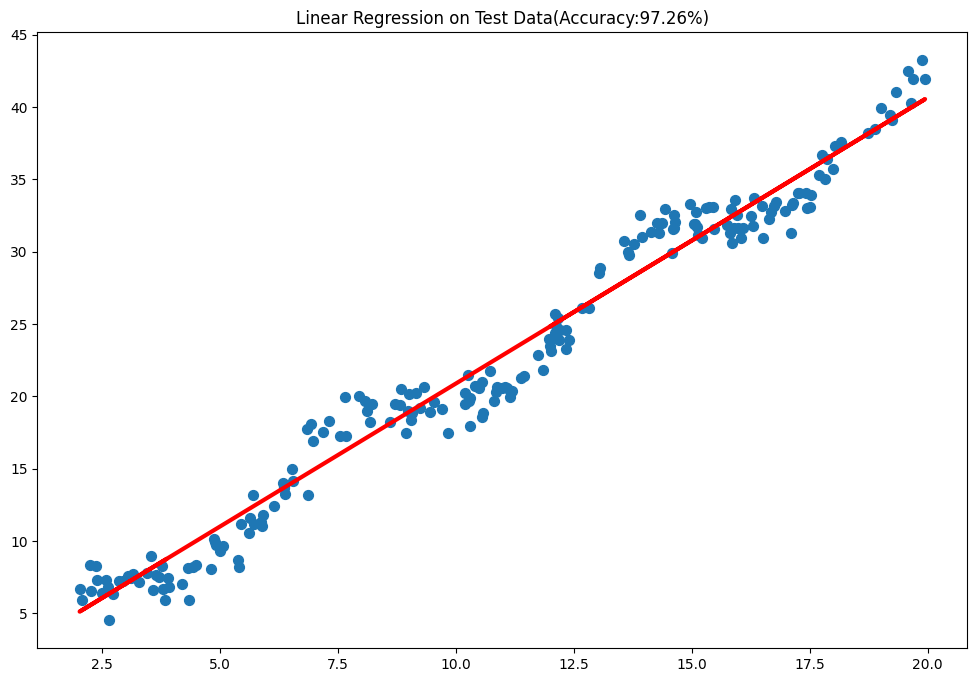

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{r2_score:.2f}%)')